# Extract features

Emotion Counts:
North: 2857
Central: 3001
South: 2540


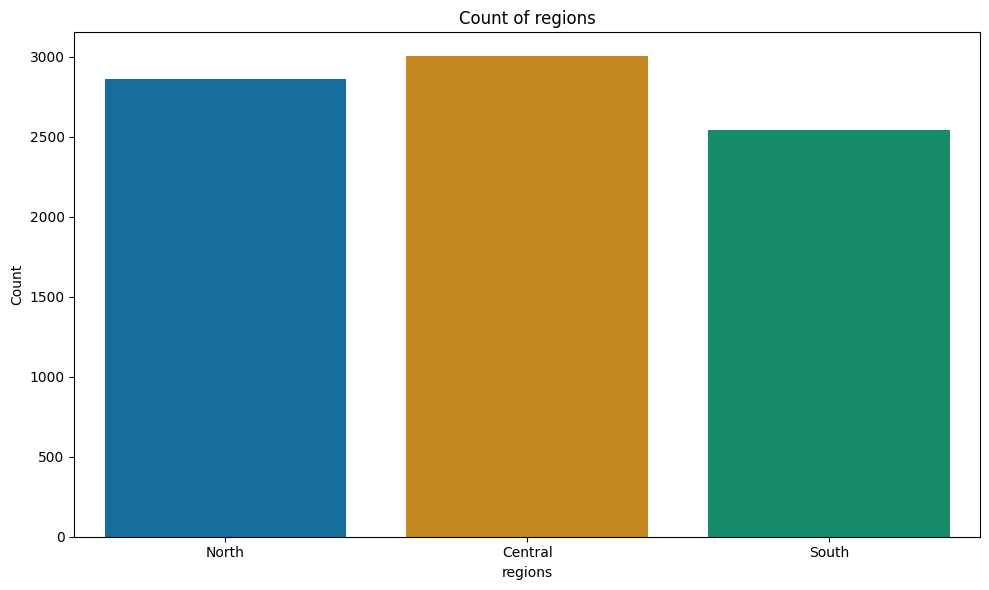

In [5]:
import os
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# Đường dẫn tới thư mục chứa tập dữ liệu
path = "/kaggle/input/vietnamese-accent-3-regions/***/**/*.wav"

# Mapping RAVDESS numeric encoding to regions
region_map = {
    '1': 'North',
    '2': 'Central',
    '3': 'South',
}

# Extract region labels from filenames
filenames = glob.glob(path, recursive=True)
regions = [region_map[os.path.basename(f).split('-')[0]] for f in filenames if os.path.basename(f).split('-')[0] in region_map]

# Count occurrences of each region
region_counts = Counter(regions)

# Sort regions by predefined order
region_order = ['North', 'Central', 'South']
counts = [region_counts[r] for r in region_order if r in region_counts]

# Print the count of each region
print("region Counts:")
for region in region_order:
    count = region_counts.get(region, 0)
    print(f"{region}: {count}")

# Plot the region distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=pd.Series(region_order), y=counts, palette="colorblind")
plt.xlabel("regions")
plt.ylabel("Count")
plt.title("Count of regions")
plt.tight_layout()
plt.show()

Emotion Counts:
Male: 4761
Female: 3489


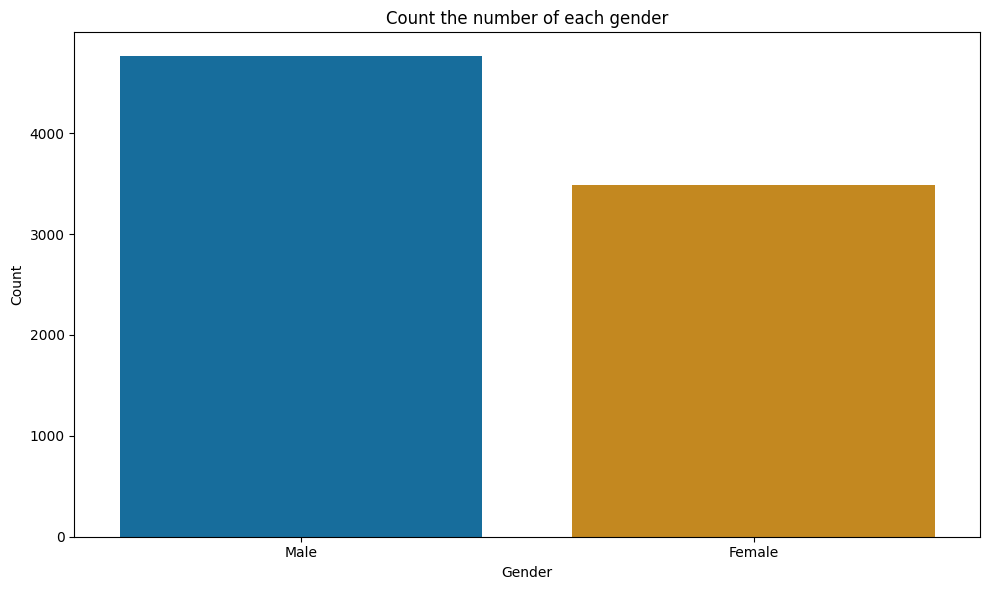

In [58]:
import os
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# Đường dẫn tới thư mục chứa tập dữ liệu
path = "/kaggle/input/vietnamese-accent-3-regions/***/**/*.wav"

# Mapping RAVDESS numeric encoding to regions
Gender_map = {
    '0': 'Male',
    '1': 'Female'
}

# Extract region labels from filenames
filenames = glob.glob(path, recursive=True)
genders = [Gender_map[os.path.basename(f).split('-')[2]] for f in filenames if os.path.basename(f).split('-')[2] in Gender_map]

# Count occurrences of each region
genders_counts = Counter(genders)

# Sort regions by predefined order
Gender_order = ['Male','Female']
counts = [genders_counts[g] for g in Gender_order if g in genders_counts]

# Print the count of each region
print("region Counts:")
for g in Gender_order:
    count = genders_counts.get(g, 0)
    print(f"{g}: {count}")

# Plot the region distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=pd.Series(Gender_order), y=counts, palette="colorblind")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count the number of each gender")
plt.tight_layout()
plt.show()

Region_Gender Counts:
North_Male: 2128
North_Female: 729
Central_Male: 1480
Central_Female: 1373
South_Male: 1153
South_Female: 1387


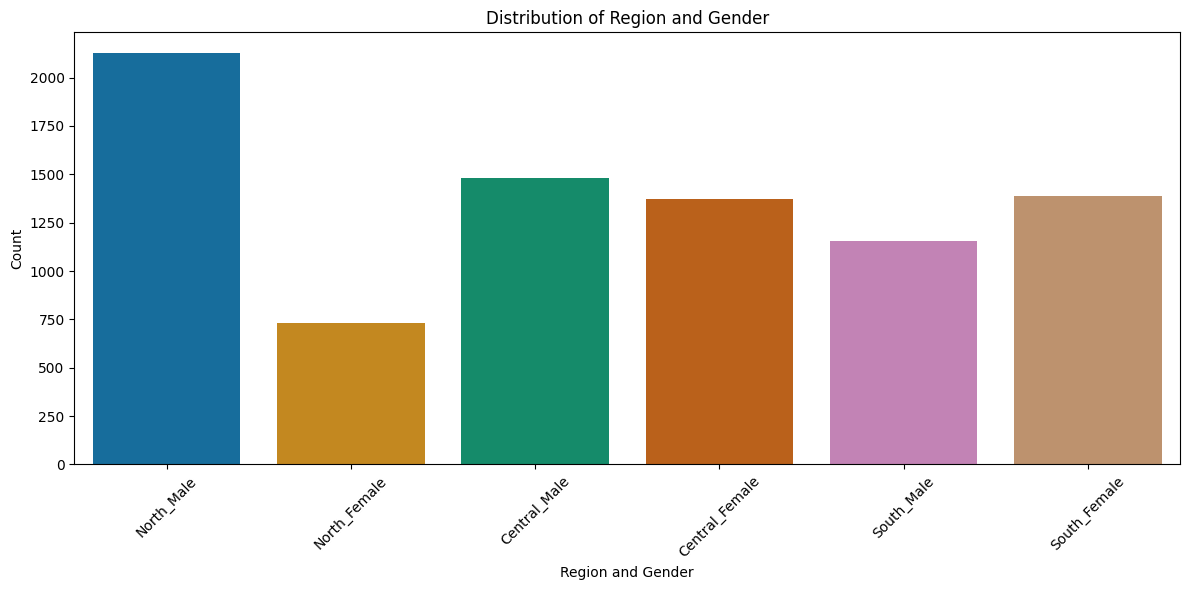

In [63]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# Đường dẫn tới thư mục chứa tập dữ liệu
path = "/kaggle/input/vietnamese-accent-3-regions/***/**/*.wav"

# Mapping RAVDESS numeric encoding to regions và gender
region_map = {
    '1': 'North',
    '2': 'Central',
    '3': 'South',
}
gender_map = {
    '0': 'Male',
    '1': 'Female',
}

# Trích xuất region và gender từ tên file
filenames = glob.glob(path, recursive=True)
region_gender_list = []
for f in filenames:
    basename = os.path.basename(f)
    parts = basename.split('-')
    if len(parts) >= 2 and parts[0] in region_map:
        region = region_map[parts[0]]  # Lấy region từ phần đầu tiên
        # Giả sử gender nằm ở phần thứ hai của tên file (điều chỉnh nếu khác)
        gender = gender_map.get(parts[2], 'Unknown')  # Lấy gender (nếu có)
        region_gender = f"{region}_{gender}"
        region_gender_list.append(region_gender)

# Đếm số lượng từng tổ hợp region_gender
region_gender_counts = Counter(region_gender_list)

# Tạo danh sách tổ hợp theo thứ tự mong muốn
region_gender_order = [
    'North_Male', 'North_Female',
    'Central_Male', 'Central_Female',
    'South_Male', 'South_Female'
]
counts = [region_gender_counts.get(rg, 0) for rg in region_gender_order]

# In số lượng từng tổ hợp
print("Region_Gender Counts:")
for rg in region_gender_order:
    count = region_gender_counts.get(rg, 0)
    print(f"{rg}: {count}")

# Tạo DataFrame để visualize
data = pd.DataFrame({
    'Region_Gender': region_gender_order,
    'Count': counts
})

# Plot phân bố region_gender
plt.figure(figsize=(12, 6))
sns.barplot(x='Region_Gender', y='Count', data=data, palette="colorblind")
plt.xlabel("Region and Gender")
plt.ylabel("Count")
plt.title("Distribution of Region and Gender")
plt.xticks(rotation=45)  # Xoay nhãn để dễ đọc
plt.tight_layout()
plt.show()

In [26]:
# Hàm chuẩn hóa độ dài âm thanh
def pad_or_trim_audio(data, sr, target_length=3):
    target_samples = int(sr * target_length)
    current_length = len(data)

    if current_length < target_samples:  # Nếu ngắn hơn, chèn thêm 0 (padding)
        pad_width = target_samples - current_length
        data = np.pad(data, (0, pad_width), mode='constant')
    else:  # Nếu dài hơn, cắt bớt (trimming)
        data = data[:target_samples]

    return data
    
def match_loudness(audio, target_rms = 0.015823712572455406):
    current_rms = np.sqrt(np.mean(audio**2))
    if current_rms == 0:
        return audio
    scalar = target_rms / current_rms
    return audio * scalar
    
# Hàm chuẩn hóa âm thanh
def normalize_audio(data):
    return librosa.util.normalize(data)

# Hàm trích xuất đặc trưng
def extract_features(data, sampling_rate, n_mfcc=40):
    mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=n_mfcc).mean(axis=1)
    chroma = librosa.feature.chroma_stft(y=data, sr=sampling_rate).mean(axis=1)
    spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sampling_rate).mean()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=data, sr=sampling_rate).mean()
    return np.hstack((mfccs, chroma, [spectral_centroid], [spectral_bandwidth]))

# Thư mục chứa file âm thanh
audio_folder = "/kaggle/input/vietnamese-accent-3-regions"  # Cập nhật đường dẫn đúng

# Dữ liệu huấn luyện
X_path = []
X = []  # input
y_region = []  # label
y_gender = []
# Duyệt qua tất cả các file trong thư mục
for root, dirs, files in os.walk(audio_folder):
    for filename in files:
        if filename.endswith(".wav"):
            file_path = os.path.join(root, filename)
            
            # Tải âm thanh
            data, sampling_rate = librosa.load(file_path, sr=48000)
            data = match_loudness(data)
            data = normalize_audio(data)
            
            # Trích xuất đặc trưng
            features = extract_features(data, sampling_rate)
            
            # Lấy nhãn từ tên file (số thứ 3 trong tên file)
            label_region = filename.split("-")[0]  # Lấy phần tử thứ 3 (index 2)
            label_gender = filename.split("-")[2]
            # Chọn mẫu đầu tiên để in ra biểu đồ 
            # Lưu vào danh sách
            X.append(features)
            y_region.append(label_region)
            y_gender.append(label_gender)
            X_path.append(file_path)
# Chuyển X thành DataFrame
feature_names = [f"mfcc_{i}" for i in range(40)] + \
                [f"chroma_{i}" for i in range(12)] + \
                ["spectral_centroid", "spectral_bandwidth"]
features_df = pd.DataFrame(X_path, columns=['path'])
features_df[feature_names] = X
features_df['region'] = y_region
features_df['gender'] = y_gender

# Lưu thành CSV
features_df.to_csv("SRR_SGR_Dataset.csv", index=False)
print("✅ Feature extraction completed and saved to audio_features.csv.")

✅ Feature extraction completed and saved to audio_features.csv.


# Data augmentation and balancing

In [70]:
features_df = pd.read_csv('/kaggle/working/SRR_SGR_Dataset.csv')
srr_data = features_df.copy().iloc[:,1:-1]
srr_data

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,spectral_centroid,spectral_bandwidth,region
0,-174.577209,197.581039,-15.497263,22.221201,-1.023988,6.844562,-11.384507,-10.547414,-14.099674,-6.198326,...,0.272099,0.345603,0.310696,0.323372,0.411162,0.446885,0.565165,1550.817069,2322.216329,2
1,-179.347015,190.880646,-18.104038,25.781679,-3.070601,8.387602,-11.715434,-6.906836,-14.242466,-7.537291,...,0.319541,0.338916,0.359488,0.338951,0.386582,0.407103,0.498973,1707.861301,2465.959700,2
2,-159.102646,194.002853,-24.025587,19.619852,-4.624568,10.386424,-10.342922,-9.486584,-13.886312,-10.057470,...,0.382776,0.403537,0.376137,0.426937,0.390683,0.337591,0.407981,1650.832877,2364.767215,2
3,-166.110336,194.965561,-18.901358,22.478832,-2.018533,8.353815,-10.946491,-12.013854,-14.383972,-5.510294,...,0.295462,0.338120,0.292811,0.329223,0.424849,0.420198,0.448137,1626.386916,2347.553504,2
4,-178.607208,194.168793,-18.482080,19.478298,-1.378605,10.875687,-12.200864,-8.940304,-14.668412,-7.521339,...,0.365340,0.354902,0.324441,0.386489,0.414920,0.394649,0.407487,1610.618665,2364.345676,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,-274.613129,157.604416,-6.442787,31.579153,11.473318,16.444866,-11.051372,-15.467440,-0.407944,-15.555330,...,0.341744,0.346369,0.349980,0.385450,0.459765,0.492509,0.430250,2040.269662,2282.989043,3
8246,-254.743011,170.607422,-12.483891,26.759539,2.460401,9.788150,-12.588899,-12.022786,-1.636019,-18.173780,...,0.334960,0.407860,0.451878,0.508964,0.454046,0.378923,0.369609,1922.953422,2311.509789,3
8247,-260.082245,173.905029,-0.779012,39.375927,15.067256,21.224979,-10.886063,-17.903822,-3.202862,-20.539042,...,0.400224,0.333799,0.321710,0.402114,0.475372,0.513714,0.478221,1542.176046,2259.585747,3
8248,-254.933350,161.584656,-11.032024,31.392942,0.546656,18.742674,-13.430548,-13.549743,0.850427,-15.777898,...,0.404731,0.407378,0.404987,0.498383,0.512122,0.473435,0.418484,2139.936814,2667.131179,3


In [71]:
sgr_data = features_df.copy().iloc[:,1:-2]
sgr_data['gender'] =  features_df.copy()['gender']
sgr_data

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,spectral_centroid,spectral_bandwidth,gender
0,-174.577209,197.581039,-15.497263,22.221201,-1.023988,6.844562,-11.384507,-10.547414,-14.099674,-6.198326,...,0.272099,0.345603,0.310696,0.323372,0.411162,0.446885,0.565165,1550.817069,2322.216329,0
1,-179.347015,190.880646,-18.104038,25.781679,-3.070601,8.387602,-11.715434,-6.906836,-14.242466,-7.537291,...,0.319541,0.338916,0.359488,0.338951,0.386582,0.407103,0.498973,1707.861301,2465.959700,0
2,-159.102646,194.002853,-24.025587,19.619852,-4.624568,10.386424,-10.342922,-9.486584,-13.886312,-10.057470,...,0.382776,0.403537,0.376137,0.426937,0.390683,0.337591,0.407981,1650.832877,2364.767215,0
3,-166.110336,194.965561,-18.901358,22.478832,-2.018533,8.353815,-10.946491,-12.013854,-14.383972,-5.510294,...,0.295462,0.338120,0.292811,0.329223,0.424849,0.420198,0.448137,1626.386916,2347.553504,0
4,-178.607208,194.168793,-18.482080,19.478298,-1.378605,10.875687,-12.200864,-8.940304,-14.668412,-7.521339,...,0.365340,0.354902,0.324441,0.386489,0.414920,0.394649,0.407487,1610.618665,2364.345676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,-274.613129,157.604416,-6.442787,31.579153,11.473318,16.444866,-11.051372,-15.467440,-0.407944,-15.555330,...,0.341744,0.346369,0.349980,0.385450,0.459765,0.492509,0.430250,2040.269662,2282.989043,1
8246,-254.743011,170.607422,-12.483891,26.759539,2.460401,9.788150,-12.588899,-12.022786,-1.636019,-18.173780,...,0.334960,0.407860,0.451878,0.508964,0.454046,0.378923,0.369609,1922.953422,2311.509789,1
8247,-260.082245,173.905029,-0.779012,39.375927,15.067256,21.224979,-10.886063,-17.903822,-3.202862,-20.539042,...,0.400224,0.333799,0.321710,0.402114,0.475372,0.513714,0.478221,1542.176046,2259.585747,1
8248,-254.933350,161.584656,-11.032024,31.392942,0.546656,18.742674,-13.430548,-13.549743,0.850427,-15.777898,...,0.404731,0.407378,0.404987,0.498383,0.512122,0.473435,0.418484,2139.936814,2667.131179,1


In [72]:
import pandas as pd
import numpy as np

# Hàm thêm nhiễu vào đặc trưng
def add_noise_to_features(features, noise_factor=0.02):
    noise = np.random.randn(len(features)) * noise_factor
    augmented_features = features + noise
    return augmented_features

# Danh sách các cột đặc trưng
feature_cols = [f'mfcc_{i}' for i in range(40)] + [f'chroma_{i}' for i in range(12)] + \
               ['spectral_centroid', 'spectral_bandwidth']

# --- SRR_data ---
# Đếm số mẫu theo region
region_counts = srr_data['region'].value_counts()
print("Số mẫu ban đầu theo region:")
print(region_counts)

# Xác định lớp A (region có ít mẫu nhất)
class_min_region = region_counts.idxmin()
A_count_region = region_counts.min()
target_count_region = A_count_region * 2  # Số mẫu mục tiêu cho tất cả các region

print(f"\nLớp min (region): {class_min_region} với {A_count_region} mẫu, target cho tất cả là {target_count_region} mẫu.")

# Danh sách để lưu dữ liệu tăng cường cho SRR_data
augmented_srr_data = []

# Xử lý từng region
for region in region_counts.index:
    class_df = srr_data[srr_data['region'] == region]
    current_count = len(class_df)
    
    # Tính số mẫu cần augment để đạt target
    if region == class_min_region:
        augment_count = A_count_region  # Nhân đôi lớp A
    else:
        augment_count = target_count_region - current_count  # Đưa các lớp khác lên target
    
    print(f"\nXử lý region {region}:")
    print(f"  Số mẫu hiện tại: {current_count}")
    print(f"  Số mẫu cần augment: {augment_count}")
    
    # Lấy mẫu ngẫu nhiên để augment
    augment_samples = class_df.sample(n=augment_count, replace=True) if augment_count > 0 else pd.DataFrame()
    
    # Thêm nhiễu vào đặc trưng
    for idx, row in augment_samples.iterrows():
        features = row[feature_cols].values.astype(np.float32)
        augmented_features = add_noise_to_features(features)
        augmented_row = {col: val for col, val in zip(feature_cols, augmented_features)}
        augmented_row['region'] = region
        augmented_srr_data.append(augmented_row)

# Gộp dữ liệu gốc và dữ liệu tăng cường
augmented_srr_df = pd.DataFrame(augmented_srr_data)
final_srr_df = pd.concat([srr_data, augmented_srr_df], ignore_index=True)
# Lưu SRR_data
final_srr_df.to_csv('SRR_data.csv', index=False)
print("\nSố mẫu sau khi augment trong SRR_data:")
print(final_srr_df['region'].value_counts())
final_srr_df

Số mẫu ban đầu theo region:
region
1    2857
2    2853
3    2540
Name: count, dtype: int64

Lớp min (region): 3 với 2540 mẫu, target cho tất cả là 5080 mẫu.

Xử lý region 1:
  Số mẫu hiện tại: 2857
  Số mẫu cần augment: 2223

Xử lý region 2:
  Số mẫu hiện tại: 2853
  Số mẫu cần augment: 2227

Xử lý region 3:
  Số mẫu hiện tại: 2540
  Số mẫu cần augment: 2540

Số mẫu sau khi augment trong SRR_data:
region
2    5080
1    5080
3    5080
Name: count, dtype: int64


,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,spectral_centroid,spectral_bandwidth,region
0,-174.577209,197.581039,-15.497263,22.221201,-1.023988,6.844562,-11.384507,-10.547414,-14.099674,-6.198326,...,0.272099,0.345603,0.310696,0.323372,0.411162,0.446885,0.565165,1550.817069,2322.216329,2
1,-179.347015,190.880646,-18.104038,25.781679,-3.070601,8.387602,-11.715434,-6.906836,-14.242466,-7.537291,...,0.319541,0.338916,0.359488,0.338951,0.386582,0.407103,0.498973,1707.861301,2465.959700,2
2,-159.102646,194.002853,-24.025587,19.619852,-4.624568,10.386424,-10.342922,-9.486584,-13.886312,-10.057470,...,0.382776,0.403537,0.376137,0.426937,0.390683,0.337591,0.407981,1650.832877,2364.767215,2
3,-166.110336,194.965561,-18.901358,22.478832,-2.018533,8.353815,-10.946491,-12.013854,-14.383972,-5.510294,...,0.295462,0.338120,0.292811,0.329223,0.424849,0.420198,0.448137,1626.386916,2347.553504,2
4,-178.607208,194.168793,-18.482080,19.478298,-1.378605,10.875687,-12.200864,-8.940304,-14.668412,-7.521339,...,0.365340,0.354902,0.324441,0.386489,0.414920,0.394649,0.407487,1610.618665,2364.345676,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15235,-114.156366,159.620459,-47.250333,54.241741,-21.786723,16.177202,-9.647351,15.320362,-3.924248,-5.383332,...,0.262934,0.334355,0.196596,0.293887,0.300142,0.308221,0.399839,2504.621380,2895.275347,3
15236,-213.371254,114.676237,-9.505638,51.957751,-17.207920,15.153239,-20.413683,-0.771636,-6.214044,-20.367902,...,0.266787,0.380105,0.455498,0.482414,0.421495,0.347406,0.318062,3311.143134,3531.603631,3
15237,-173.725118,221.886797,-11.906395,22.449674,-11.740904,19.213823,-26.158717,18.087938,3.028418,-8.248193,...,0.321957,0.355850,0.585023,0.341118,0.260263,0.287645,0.575778,1487.602093,2235.572406,3
15238,-67.088754,146.424097,-49.823373,63.556375,-27.318674,36.348180,-20.129148,16.116332,-9.465673,5.219908,...,0.377035,0.297874,0.322585,0.324545,0.448785,0.689754,0.485334,3449.375629,3582.156798,3


In [73]:
# Đếm số mẫu theo gender
gender_counts = sgr_data['gender'].value_counts()
print("\nSố mẫu ban đầu theo gender:")
print(gender_counts)

# Xác định lớp A (gender có ít mẫu nhất)
class_min_region = gender_counts.idxmin()
A_count_gender = gender_counts.min()
target_count_gender = A_count_gender * 2  # Số mẫu mục tiêu cho tất cả các gender

print(f"\nLớp A (gender): {class_min_region} với {A_count_gender} mẫu, target cho tất cả là {target_count_gender} mẫu.")

# Danh sách để lưu dữ liệu tăng cường cho SGR_data
augmented_sgr_data = []

# Xử lý từng gender
for gender in gender_counts.index:
    class_df = sgr_data[sgr_data['gender'] == gender]
    current_count = len(class_df)
    
    # Tính số mẫu cần augment để đạt target
    if gender == class_min_region:
        augment_count = A_count_gender  # Nhân đôi lớp A
    else:
        augment_count = target_count_gender - current_count  # Đưa các lớp khác lên target
    
    print(f"\nXử lý gender {gender}:")
    print(f"  Số mẫu hiện tại: {current_count}")
    print(f"  Số mẫu cần augment: {augment_count}")
    
    # Lấy mẫu ngẫu nhiên để augment
    augment_samples = class_df.sample(n=augment_count, replace=True) if augment_count > 0 else pd.DataFrame()
    
    # Thêm nhiễu vào đặc trưng
    for idx, row in augment_samples.iterrows():
        features = row[feature_cols].values.astype(np.float32)
        augmented_features = add_noise_to_features(features)
        augmented_row = {col: val for col, val in zip(feature_cols, augmented_features)}
        augmented_row['gender'] = gender
        augmented_sgr_data.append(augmented_row)

# Gộp dữ liệu gốc và dữ liệu tăng cường
augmented_sgr_df = pd.DataFrame(augmented_sgr_data)
final_sgr_df = pd.concat([sgr_data, augmented_sgr_df], ignore_index=True)

# Lưu SGR_data
final_sgr_df.to_csv('SGR_data.csv', index=False)
print("\nSố mẫu sau khi augment trong SGR_data:")
print(final_sgr_df['gender'].value_counts())
final_sgr_df


Số mẫu ban đầu theo gender:
gender
0    4761
1    3489
Name: count, dtype: int64

Lớp A (gender): 1 với 3489 mẫu, target cho tất cả là 6978 mẫu.

Xử lý gender 0:
  Số mẫu hiện tại: 4761
  Số mẫu cần augment: 2217

Xử lý gender 1:
  Số mẫu hiện tại: 3489
  Số mẫu cần augment: 3489

Số mẫu sau khi augment trong SGR_data:
gender
0    6978
1    6978
Name: count, dtype: int64


,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,spectral_centroid,spectral_bandwidth,gender
0,-174.577209,197.581039,-15.497263,22.221201,-1.023988,6.844562,-11.384507,-10.547414,-14.099674,-6.198326,...,0.272099,0.345603,0.310696,0.323372,0.411162,0.446885,0.565165,1550.817069,2322.216329,0
1,-179.347015,190.880646,-18.104038,25.781679,-3.070601,8.387602,-11.715434,-6.906836,-14.242466,-7.537291,...,0.319541,0.338916,0.359488,0.338951,0.386582,0.407103,0.498973,1707.861301,2465.959700,0
2,-159.102646,194.002853,-24.025587,19.619852,-4.624568,10.386424,-10.342922,-9.486584,-13.886312,-10.057470,...,0.382776,0.403537,0.376137,0.426937,0.390683,0.337591,0.407981,1650.832877,2364.767215,0
3,-166.110336,194.965561,-18.901358,22.478832,-2.018533,8.353815,-10.946491,-12.013854,-14.383972,-5.510294,...,0.295462,0.338120,0.292811,0.329223,0.424849,0.420198,0.448137,1626.386916,2347.553504,0
4,-178.607208,194.168793,-18.482080,19.478298,-1.378605,10.875687,-12.200864,-8.940304,-14.668412,-7.521339,...,0.365340,0.354902,0.324441,0.386489,0.414920,0.394649,0.407487,1610.618665,2364.345676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13951,-179.755202,212.691898,-29.911554,37.927363,16.811085,-24.786593,19.134208,-4.213299,-9.321596,8.742118,...,0.444830,0.454346,0.386378,0.317947,0.315082,0.431703,0.399366,1351.674719,1733.793354,1
13952,-108.554578,154.917814,-36.635761,49.464478,-11.730783,31.542852,-22.397395,10.415118,-5.097839,-0.383967,...,0.237011,0.208332,0.287843,0.239223,0.313065,0.360567,0.316747,2709.465377,3333.888196,1
13953,-355.429592,130.763406,11.796126,13.727667,3.773887,10.596737,4.466942,3.300716,2.182264,-8.613605,...,0.371454,0.395029,0.415705,0.465201,0.491498,0.503057,0.472217,2394.018745,2846.247837,1
13954,-333.556766,184.570717,11.960155,16.037267,11.649728,4.537297,-0.741460,12.139081,7.545070,-4.458730,...,0.254644,0.304206,0.311729,0.331225,0.426687,0.522364,0.605554,1194.169762,1985.018915,1


In [74]:
# Miền Bắc bị lệch giới tính nam 2128, nữ có 729 nên không thể dùng code này được.

# import pandas as pd
# import numpy as np

# # Hàm thêm nhiễu vào đặc trưng
# def add_noise_to_features(features, noise_factor=0.005):
#     noise = np.random.randn(len(features)) * noise_factor
#     augmented_features = features + noise
#     return augmented_features

# # Đọc dữ liệu từ file CSV
# data = pd.read_csv('/kaggle/working/SRR_SGR_Dataset.csv')  # Thay bằng đường dẫn file CSV của bạn

# # Danh sách các cột đặc trưng
# feature_cols = [f'mfcc_{i}' for i in range(40)] + [f'chroma_{i}' for i in range(12)] + \
#                ['spectral_centroid', 'spectral_bandwidth']

# # Tạo cột tổ hợp region-gender
# data['region_gender'] = data['region'].astype(str) + '_' + data['gender'].astype(str)

# # Đếm số mẫu theo tổ hợp
# combo_counts = data['region_gender'].value_counts()
# print("Số mẫu ban đầu theo tổ hợp region_gender:")
# print(combo_counts)

# # Xác định lớp A (tổ hợp ít nhất) và target
# class_min_combo = combo_counts.idxmin()
# min_count_combo = combo_counts.min()
# target_count_combo = max(min_count_combo * 2, 10)  # Nhân đôi hoặc ít nhất 10 mẫu mỗi tổ hợp

# print(f"\nLớp A (tổ hợp): {class_min_combo} với {min_count_combo} mẫu, target cho mỗi tổ hợp là {target_count_combo} mẫu.")

# # --- Xử lý cho cả SRR_data và SGR_data ---
# for output_file, drop_cols in [('SRR_data.csv', ['path', 'gender']), ('SGR_data.csv', ['path', 'region'])]:
#     # Loại bỏ cột không cần thiết
#     working_data = data.drop(columns=drop_cols)
    
#     # Danh sách để lưu dữ liệu tăng cường
#     augmented_data = []
    
#     # Xử lý từng tổ hợp
#     for combo in combo_counts.index:
#         region, gender = map(int, combo.split('_'))
#         class_df = data[data['region_gender'] == combo]
#         current_count = len(class_df)
        
#         # Tính số mẫu cần augment
#         augment_count = target_count_combo - current_count
        
#         print(f"\nXử lý tổ hợp {combo}:")
#         print(f"  Số mẫu hiện tại: {current_count}")
#         print(f"  Số mẫu cần augment: {augment_count}")
        
#         # Lấy mẫu ngẫu nhiên để augment
#         augment_samples = class_df.sample(n=augment_count, replace=True) if augment_count > 0 else pd.DataFrame()
        
#         # Thêm nhiễu vào đặc trưng
#         for idx, row in augment_samples.iterrows():
#             features = row[feature_cols].values.astype(np.float32)
#             augmented_features = add_noise_to_features(features)
#             augmented_row = {col: val for col, val in zip(feature_cols, augmented_features)}
#             augmented_row['region'] = region
#             augmented_row['gender'] = gender
#             augmented_data.append(augmented_row)
    
#     # Gộp dữ liệu gốc và dữ liệu tăng cường
#     augmented_df = pd.DataFrame(augmented_data)
#     final_df = pd.concat([working_data.drop(columns=['region_gender']), augmented_df], ignore_index=True)
    
#     # Lưu file
#     final_df.to_csv(output_file, index=False)
#     print(f"\nSố mẫu sau khi augment trong {output_file}:")
#     print(final_df.groupby(['region', 'gender']).size())


# Prepare 2D data for CNN Model

In [1]:
!pip install keras-tuner

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Dropout, Input, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

region Counts:
North: 5080
Central: 5080
South: 5080


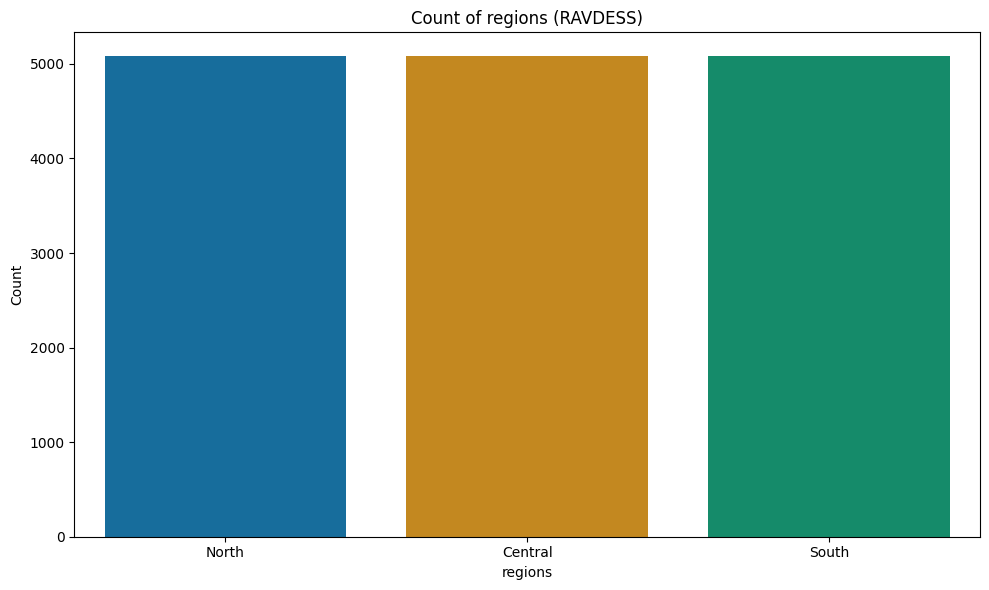

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

region_df = pd.read_csv("/kaggle/input/srr-and-sgr/SRR_data.csv")
# Mapping RAVDESS numeric encoding to regions
region_map = {
    '1': 'North',
    '2': 'Central',
    '3': 'South',
}


region_df['label_name'] = region_df['region'].astype(str).map(region_map)

region_order = list(region_map.values())
region_counts = region_df['label_name'].value_counts().reindex(region_order, fill_value=0)

# In kết quả
print("region Counts:")
for region, count in region_counts.items():
    print(f"{region}: {count}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="colorblind")
plt.xlabel("regions")
plt.ylabel("Count")
plt.title("Count of regions (RAVDESS)")
plt.tight_layout()
plt.show()

gender Counts:
Male: 6978
Female: 6978


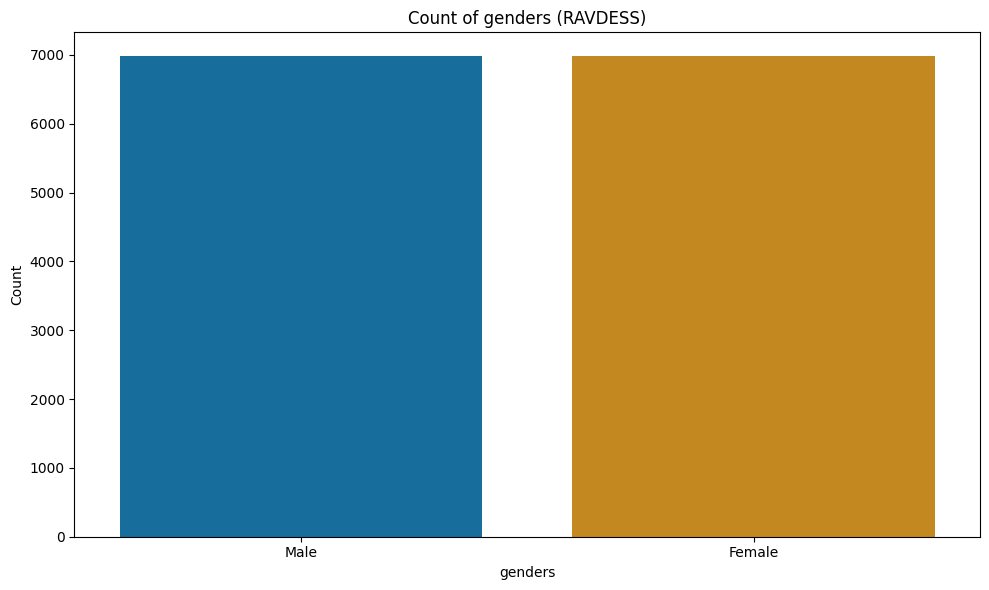

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gender_df = pd.read_csv("/kaggle/input/srr-and-sgr/SGR_data.csv")


gender_map = {
    '0': 'Male',
    '1': 'Female'
}


gender_df['label_name'] = gender_df['gender'].astype(str).map(gender_map)

gender_order = list(gender_map.values())
gender_counts = gender_df['label_name'].value_counts().reindex(gender_order, fill_value=0)

# In kết quả
print("gender Counts:")
for gender, count in gender_counts.items():
    print(f"{gender}: {count}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="colorblind")
plt.xlabel("genders")
plt.ylabel("Count")
plt.title("Count of genders (RAVDESS)")
plt.tight_layout()
plt.show()

In [4]:
Xr = region_df.iloc[:, 1:-1].values  # Bỏ cột 'path' và 'label'
yr = region_df['region'].values
  

from sklearn.model_selection import train_test_split
Xr_train, X_temp, yr_train, y_temp = train_test_split(Xr, yr, test_size=0.2, stratify=yr, random_state=42)
Xr_dev, Xr_test, yr_dev, yr_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


In [5]:
Xg = gender_df.iloc[:, 1:-1].values  # Bỏ cột 'path' và 'label'
yg = gender_df['gender'].values
  
Xg_train, X_temp, yg_train, y_temp = train_test_split(Xg, yg, test_size=0.2, stratify=yg, random_state=42)
Xg_dev, Xg_test, yg_dev, yg_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


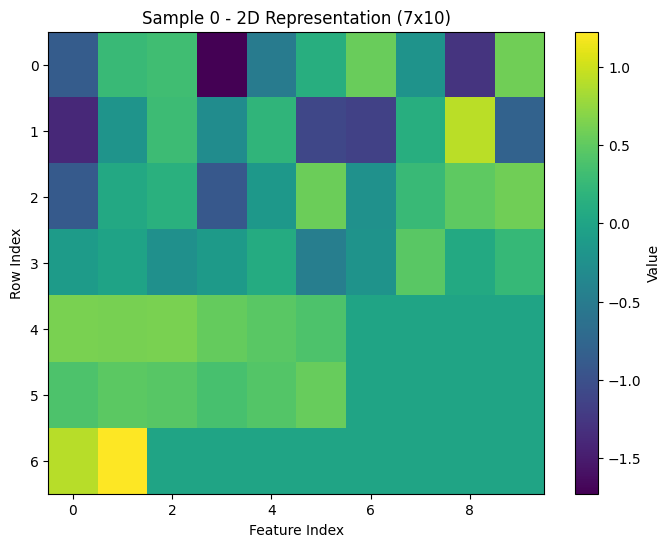

Sample values:
 [[-0.86705529  0.27769937  0.31507762 -1.72810781 -0.49425499  0.12636016
   0.55056672 -0.21084853 -1.28463931  0.58567503]
 [-1.3868347  -0.20021544  0.29086341 -0.29595123  0.20847957 -1.10154977
  -1.16185916  0.1244736   0.92359362 -0.79677841]
 [-0.89633404  0.05896788  0.14482543 -0.91512424 -0.15696154  0.55983893
  -0.23842333  0.27195186  0.4938991   0.58850155]
 [-0.10871602 -0.02068893 -0.24517776 -0.11787036  0.08829792 -0.46133077
  -0.20762667  0.47236702  0.07104266  0.25381636]
 [ 0.63214273  0.62398549  0.63437851  0.53099892  0.46411899  0.39773483
   0.          0.          0.          0.        ]
 [ 0.40035269  0.48249154  0.45323914  0.36217069  0.43499877  0.54260971
   0.          0.          0.          0.        ]
 [ 0.91018929  1.22474487  0.          0.          0.          0.
   0.          0.          0.          0.        ]]


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib


# Hàm chuyển sang 2D
def convert_1dto2d(input_1d):
    num_samples = input_1d.shape[0]
    output_2d = np.zeros((num_samples, 7, 10, 1))
    for i in range(num_samples):
        mfcc = input_1d[i, :40].reshape(4, 10)
        chroma = input_1d[i, 40:52].reshape(2, 6)
        spectral = input_1d[i, 52:54].reshape(1, 2)
        chroma_padded = np.pad(chroma, ((0, 0), (0, 4)), mode='constant')
        spectral_padded = np.pad(spectral, ((0, 0), (0, 8)), mode='constant')
        matrix_2d = np.vstack((mfcc, chroma_padded, spectral_padded))
        output_2d[i] = matrix_2d[..., np.newaxis]
    return output_2d


def make2dData( X_train, X_dev, X_test, name):
    
    scaler_mfcc = StandardScaler()
    scaler_chroma = MinMaxScaler()
    scaler_spectral = StandardScaler()
    
    # Chỉ fit trên tập train
    X_train_mfcc = scaler_mfcc.fit_transform(X_train[:, :40])
    X_train_chroma = scaler_chroma.fit_transform(X_train[:, 40:52])
    X_train_spectral = scaler_spectral.fit_transform(X_train[:, 52:54])
    
    X_dev_mfcc = scaler_mfcc.transform(X_dev[:, :40])
    X_dev_chroma = scaler_chroma.transform(X_dev[:, 40:52])
    X_dev_spectral = scaler_spectral.transform(X_dev[:, 52:54])
    
    X_test_mfcc = scaler_mfcc.transform(X_test[:, :40])
    X_test_chroma = scaler_chroma.transform(X_test[:, 40:52])
    X_test_spectral = scaler_spectral.transform(X_test[:, 52:54])

    # Lưu lại scaler để dùng cho dữ liệu thực tế sau này
    joblib.dump(scaler_mfcc, f"scaler_mfcc_{name}.pkl")
    joblib.dump(scaler_chroma, f"scaler_chroma_{name}.pkl")
    joblib.dump(scaler_spectral, f"scaler_spectral_{name}.pkl")
    
    # Gộp lại sau khi scale
    X_train_scaled = np.hstack((X_train_mfcc, X_train_chroma, X_train_spectral))
    X_dev_scaled = np.hstack((X_dev_mfcc, X_dev_chroma, X_dev_spectral))
    X_test_scaled = np.hstack((X_test_mfcc, X_test_chroma, X_test_spectral))
    
    X_train_2D = convert_1dto2d(X_train_scaled)
    X_dev_2D = convert_1dto2d(X_dev_scaled)
    X_test_2D = convert_1dto2d(X_test_scaled)
    
    
    return X_train_2D, X_dev_2D, X_test_2D


Xr_train_2D, Xr_dev_2D, Xr_test_2D = make2dData(Xr_train, Xr_dev, Xr_test, 'reg')
Xg_train_2D, Xg_dev_2D, Xg_test_2D = make2dData(Xg_train, Xg_dev, Xg_test, 'gen')

# Trực quan hóa một mẫu
sample_index = 0  # Chọn mẫu đầu tiên
sample = Xr_train_2D[sample_index, :, :, 0]  # Lấy dữ liệu 2D (7x10)

plt.figure(figsize=(8, 6))
plt.imshow(sample, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.title(f'Sample {sample_index} - 2D Representation (7x10)')
plt.xlabel('Feature Index')
plt.ylabel('Row Index')
plt.show()

print("Sample values:\n", sample)

In [23]:
num_classes =  3
yr_train_cat = tf.keras.utils.to_categorical(yr_train -1, num_classes)  
yr_dev_cat = tf.keras.utils.to_categorical(yr_dev -1, num_classes)
yr_test_cat = tf.keras.utils.to_categorical(yr_test -1, num_classes)
num_classes = 2
yg_train_cat = tf.keras.utils.to_categorical(yg_train, num_classes) 
yg_dev_cat = tf.keras.utils.to_categorical(yg_dev, num_classes)
yg_test_cat = tf.keras.utils.to_categorical(yg_test, num_classes)

# Initialize Callbacks and Evaluate function

In [8]:
# Callbacks
def Callbacks(model):
    early_stopping = EarlyStopping(
        monitor='val_accuracy',  # Theo dõi độ chính xác trên tập validation
        patience=20,  # Chờ 20 epoch trước khi dừng
        restore_best_weights=True,  # Khôi phục trọng số tốt nhất
        mode='max',  # Tối đa hóa độ chính xác
        verbose=1  # Hiển thị thông báo
    )
    
    lr_reducer = ReduceLROnPlateau(
        monitor='val_loss',  # Theo dõi mất mát trên tập validation
        factor=0.3,  # Giảm learning rate xuống 30% khi không cải thiện
        patience=8,  # Chờ 8 epoch trước khi giảm
        min_lr=1e-6,  # Learning rate tối thiểu
        verbose=1  
    )
    
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        f'best_{model}.keras',  # Lưu mô hình tốt nhất dưới dạng 'best_model.keras'
        monitor='val_accuracy',  # Theo dõi độ chính xác trên tập validation
        save_best_only=True,  # Chỉ lưu khi có cải thiện
        mode='max',  # Tối đa hóa độ chính xác
        verbose=1 
    )
    return lr_reducer, checkpoint, early_stopping

In [9]:
def Evaluateandlogperformance(model, history, X_test, y_test_cat,name ,detail=False):
    if detail:
        # Tải mô hình tốt nhất và đánh giá
        best_model = tf.keras.models.load_model(f'/kaggle/working/best_{name}.keras')
        # test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test_cat)
        test_loss, test_accuracy = best_model.evaluate(X_test, y_test_cat)
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
        dev_loss, dev_accuracy = best_model.evaluate(X_dev, y_dev_cat)
        print(f"Dev Loss: {dev_loss:.4f}, Dev Accuracy: {dev_accuracy:.4f}")
    
        # Ghi lại chi tiết hiệu suất
        print("\nDetailed Performance Summary:") 
        print(f"Training final accuracy: {history.history['accuracy'][-1]:.4f}")  
        print(f"Validation final accuracy: {history.history['val_accuracy'][-1]:.4f}")  
        print(f"Test final accuracy: {test_accuracy:.4f}")  
        print(f"Training final loss: {history.history['loss'][-1]:.4f}")  
        print(f"Validation final loss: {history.history['val_loss'][-1]:.4f}") 
        print(f"Test final loss: {test_loss:.4f}")  
        # Kiểm tra xem mục tiêu hiệu suất có đạt được không
        if dev_accuracy >= 0.8: 
            print("\n🎉 Target accuracy of 0.8 achieved on validation set!")  
        else:
            print("\n⚠️ Accuracy target of 0.8 not reached. Consider further improvements.") 


        
    # Sau khi huấn luyện xong, tính test accuracy và test loss
    test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)  # Đánh giá mô hình trên tập kiểm tra

    
    # Vẽ biểu đồ lịch sử huấn luyện
    plt.figure(figsize=(12, 4))  # Tạo khung biểu đồ với kích thước 12x4
    
    plt.subplot(1, 2, 1)  # Biểu đồ con đầu tiên (bên trái)
    
    plt.plot(history.history['accuracy'], label='Training Accuracy')  # Vẽ đường độ chính xác huấn luyện
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Vẽ đường độ chính xác validation
    plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')  # Vẽ đường ngang độ chính xác kiểm tra
    # Thêm văn bản để hiển thị giá trị test accuracy
    plt.text(len(history.history['accuracy']) * 0.5, test_accuracy + 0.02,  # Vị trí giữa trục x, trên đường kiểm tra
             f'{test_accuracy:.2f}',  
             color='r', ha='center', va='bottom')  
    plt.title(f'Model Accuracy {name}')  
    plt.xlabel('Epoch')  # Nhãn trục x là Epoch
    plt.ylabel('Accuracy')  # Nhãn trục y là Độ chính xác
    plt.legend()  # Hiển thị chú thích
    
    plt.subplot(1, 2, 2)  
    
    plt.plot(history.history['loss'], label='Training Loss')  # Vẽ đường mất mát huấn luyện
    plt.plot(history.history['val_loss'], label='Validation Loss')  # Vẽ đường mất mát validation
    plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')  # Vẽ đường ngang mất mát kiểm tra
    # Thêm văn bản để hiển thị giá trị test loss
    plt.text(len(history.history['loss']) * 0.5, test_loss + 0.02,  # Vị trí giữa trục x, trên đường kiểm tra
             f'{test_loss:.2f}',  # Giá trị mất mát với 2 chữ số thập phân
             color='r', ha='center', va='bottom') 
    plt.title(f'Model Loss {name}')  
    plt.xlabel('Epoch')  
    plt.ylabel('Loss') 
    plt.legend() 
    
    plt.figure(constrained_layout=True)   # Điều chỉnh lề để tránh lỗi
    plt.show()  

In [10]:
def compute_confusion_matrix(model, X_test, y_test, name):
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Chuyển dự đoán từ xác suất sang lớp (class) bằng cách lấy giá trị lớn nhất
    y_test_classes = np.argmax(y_test, axis=1) # Chuyển nhãn thực tế từ dạng one-hot encoding sang lớp (class)
    
    # Tính ma trận nhầm lẫn
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    
    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(10, 8))  # Đặt kích thước biểu đồ
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Vẽ heatmap với số liệu chú thích
    plt.title(f'Confusion Matrix {name}')  
    plt.ylabel('True Label')  # Nhãn trục y: Nhãn thực tế
    plt.xlabel('Predicted Label')  # Nhãn trục x: Nhãn dự đoán
    plt.show()  
    
    # In báo cáo phân loại chi tiết (Precision, Recall, F1-score)
    print("\nClassification Report:")
    print(classification_report(y_test_classes, y_pred_classes))
    
    # Tính và in Precision, Recall trung bình theo từng lớp
    report = classification_report(y_test_classes, y_pred_classes, output_dict=True)
    print("\nDetailed Metrics by Class:")  # Chỉ số chi tiết theo lớp
    for i in range(num_classes):  # Lặp qua từng lớp
        print(f"\nClass {i}:")  # Lớp {i}
        print(f"Precision: {report[str(i)]['precision']:.4f}")  # Độ chính xác: tỷ lệ dự đoán đúng trong số dự đoán
        print(f"Recall: {report[str(i)]['recall']:.4f}")  # Độ nhạy: tỷ lệ phát hiện đúng các mẫu thực tế
        print(f"F1-score: {report[str(i)]['f1-score']:.4f}")  # F1-score: trung bình điều hòa của Precision và Recall
    
    # Tính và in các chỉ số trung bình (Hiển thị các chỉ số trung bình gia quyền của toàn bộ mô hình)
    print("\nOverall Metrics:")  # Chỉ số tổng thể
    print(f"Average Precision: {report['weighted avg']['precision']:.4f}")  # Độ chính xác trung bình
    print(f"Average Recall: {report['weighted avg']['recall']:.4f}")  # Độ nhạy trung bình
    print(f"Average F1-score: {report['weighted avg']['f1-score']:.4f}")  # F1-score trung bình

# Model

In [54]:
CNN2DRegion = Sequential()

# First Conv2D layer
CNN2DRegion.add(Conv2D(
    filters=96,  # filters_0
    kernel_size=5,  # kernel_size_0
    strides=1,
    padding='same',
    activation='relu',
    input_shape=(7, 10, 1),
    kernel_regularizer=l2(0.008732453502912857)  # l2_conv_0
))
CNN2DRegion.add(BatchNormalization())
CNN2DRegion.add(MaxPooling2D(
    pool_size=2,  # pool_size_0
    strides=1,  # pool_strides_0
    padding='same'
))

# Second Conv2D layer
CNN2DRegion.add(Conv2D(
    filters=64,  # filters_1
    kernel_size=5,  # kernel_size_1
    strides=1,
    padding='same',
    activation='relu',
    kernel_regularizer=l2(0.0008307655913624025)  # l2_conv_1
))
CNN2DRegion.add(BatchNormalization())

# Dropout after Conv2D layers
CNN2DRegion.add(Dropout(rate=0.2))  # dropout_conv

# Flatten layer
CNN2DRegion.add(Flatten())

# First Dense layer
CNN2DRegion.add(Dense(
    units=96,  # units_0
    activation='relu',
    kernel_regularizer=l2(0.00036558483095598383)  # l2_dense_0
))
CNN2DRegion.add(BatchNormalization())
CNN2DRegion.add(Dropout(rate=0.3))  # dropout_dense_0

# Second Dense layer
CNN2DRegion.add(Dense(
    units=16,  # units_1
    activation='relu',
    kernel_regularizer=l2(0.0001129701550594694)  # l2_dense_1
))
CNN2DRegion.add(BatchNormalization())
CNN2DRegion.add(Dropout(rate=0.2))  # dropout_dense_1

# Output layer
CNN2DRegion.add(Dense(3, activation='softmax'))

# Compile the model
CNN2DRegion.compile(
    optimizer=Adam(learning_rate=0.00021682255492865924),  # learning_rate 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
CNN2DRegion.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 7, 10, 96)           │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 7, 10, 96)           │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 10, 96)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 10, 64)           │         153,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 7, 10, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 7, 10, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4480)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 96)                  │         430,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 96)                  │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │           1,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 589,027 (2.25 MB)

 Trainable params: 588,483 (2.24 MB)

 Non-trainable params: 544 (2.12 KB)

In [55]:
CNN2DGender = Sequential()

# First Conv2D layer
CNN2DGender.add(Conv2D(
    filters=96,  # filters_0
    kernel_size=5,  # kernel_size_0
    strides=1,
    padding='same',
    activation='relu',
    input_shape=(7, 10, 1),
    kernel_regularizer=l2(0.008732453502912857)  # l2_conv_0
))
CNN2DGender.add(BatchNormalization())
CNN2DGender.add(MaxPooling2D(
    pool_size=2,  # pool_size_0
    strides=1,  # pool_strides_0
    padding='same'
))

# Second Conv2D layer
CNN2DGender.add(Conv2D(
    filters=64,  # filters_1
    kernel_size=5,  # kernel_size_1
    strides=1,
    padding='same',
    activation='relu',
    kernel_regularizer=l2(0.0008307655913624025)  # l2_conv_1
))
CNN2DGender.add(BatchNormalization())

# Dropout after Conv2D layers
CNN2DGender.add(Dropout(rate=0.2))  # dropout_conv

# Flatten layer
CNN2DGender.add(Flatten())

# First Dense layer
CNN2DGender.add(Dense(
    units=96,  # units_0
    activation='relu',
    kernel_regularizer=l2(0.00036558483095598383)  # l2_dense_0
))
CNN2DGender.add(BatchNormalization())
CNN2DGender.add(Dropout(rate=0.3))  # dropout_dense_0

# Second Dense layer
CNN2DGender.add(Dense(
    units=16,  # units_1
    activation='relu',
    kernel_regularizer=l2(0.0001129701550594694)  # l2_dense_1
))
CNN2DGender.add(BatchNormalization())
CNN2DGender.add(Dropout(rate=0.2))  # dropout_dense_1

# Output layer
CNN2DGender.add(Dense(2, activation='softmax'))

# Compile the model
CNN2DGender.compile(
    optimizer=Adam(learning_rate=0.00021682255492865924),  # learning_rate 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
CNN2DGender.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 7, 10, 96)           │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 7, 10, 96)           │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 10, 96)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 10, 64)           │         153,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 7, 10, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 7, 10, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4480)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 96)                  │         430,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 96)                  │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │           1,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 589,010 (2.25 MB)

 Trainable params: 588,466 (2.24 MB)

 Non-trainable params: 544 (2.12 KB)

In [56]:
lr_reducer, checkpoint, early_stopping = Callbacks('CNN2DRegion')
# Huấn luyện
historyCNN2DRegion = CNN2DRegion.fit(
    Xr_train_2D,  # Dữ liệu huấn luyện tăng cường
    yr_train_cat,  # Nhãn huấn luyện dạng one-hot
    epochs=200, 
    batch_size=64,  
    validation_data=(Xr_dev_2D, yr_dev_cat),  # Dữ liệu validation
    callbacks=[lr_reducer, checkpoint, early_stopping],  # Sử dụng các callback
    verbose=1  # Hiển thị tiến trình huấn luyện
)

Epoch 1/200
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7345 - loss: 0.8300
Epoch 1: val_accuracy improved from -inf to 0.81037, saving model to best_CNN2DRegion.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7352 - loss: 0.8283 - val_accuracy: 0.8104 - val_loss: 0.8318 - learning_rate: 2.1682e-04
Epoch 2/200
175/191 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9874 - loss: 0.2270
Epoch 2: val_accuracy improved from 0.81037 to 0.99869, saving model to best_CNN2DRegion.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9877 - loss: 0.2260 - val_accuracy: 0.9987 - val_loss: 0.3272 - learning_rate: 2.1682e-04
Epoch 3/200
181/191 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.1878
Epoch 3: val_accuracy improved from 0.99869 to 1.00000, saving model to best_CNN2DRegion.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9965 - loss: 0.1875 - val_accuracy: 1.0000 - val_loss: 0.1628 - learning_rate: 2.1682e-04
Epoch 4/200
180/191 

In [57]:
lr_reducer, checkpoint, early_stopping = Callbacks('CNN2DGender')
# Huấn luyện
historyCNN2DGender = CNN2DGender.fit(
    Xg_train_2D,  # Dữ liệu huấn luyện tăng cường
    yg_train_cat,  # Nhãn huấn luyện dạng one-hot
    epochs=200, 
    batch_size=64,  
    validation_data=(Xg_dev_2D, yg_dev_cat),  # Dữ liệu validation
    callbacks=[lr_reducer, checkpoint, early_stopping],  # Sử dụng các callback
    verbose=1  # Hiển thị tiến trình huấn luyện
)

Epoch 1/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8536 - loss: 0.4955
Epoch 1: val_accuracy improved from -inf to 0.50072, saving model to best_CNN2DGender.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.8541 - loss: 0.4944 - val_accuracy: 0.5007 - val_loss: 0.7743 - learning_rate: 2.1682e-04
Epoch 2/200
163/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.1697
Epoch 2: val_accuracy improved from 0.50072 to 1.00000, saving model to best_CNN2DGender.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9989 - loss: 0.1694 - val_accuracy: 1.0000 - val_loss: 0.2904 - learning_rate: 2.1682e-04
Epoch 3/200
163/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9997 - loss: 0.1568
Epoch 3: val_accuracy did not improve from 1.00000
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 0.1567 - val_accuracy: 1.0000 - val_loss: 0.1529 - learning_rate: 2.1682e-04
Epoch 4/200
163/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.1629


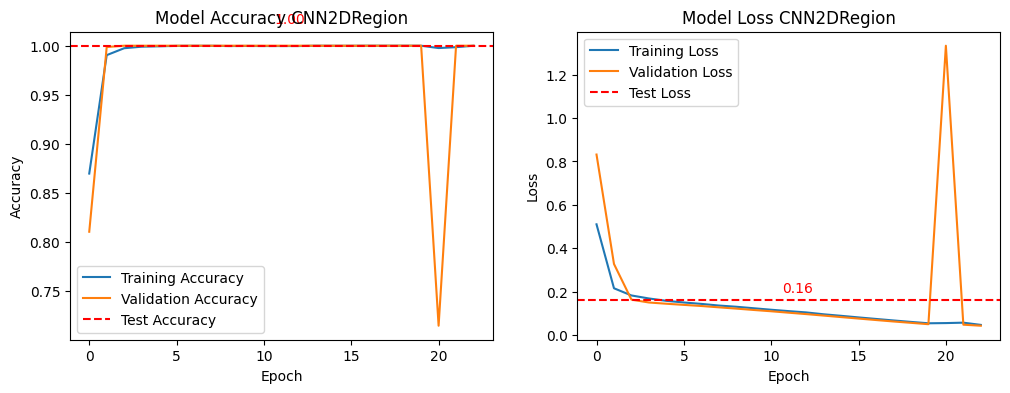

<Figure size 640x480 with 0 Axes>

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.2981


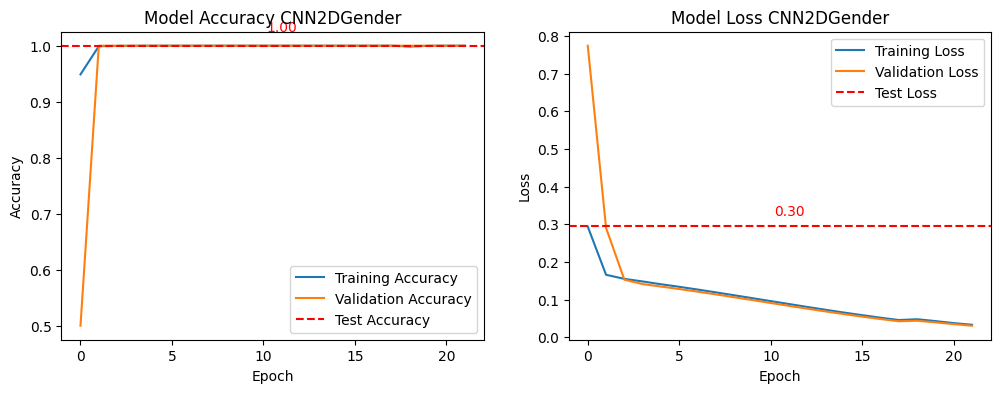

<Figure size 640x480 with 0 Axes>

In [58]:
Evaluateandlogperformance(CNN2DRegion, historyCNN2DRegion, Xr_test_2D, yr_test_cat, 'CNN2DRegion', detail = False)
Evaluateandlogperformance(CNN2DGender, historyCNN2DGender, Xg_test_2D, yg_test_cat, 'CNN2DGender', detail = False)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


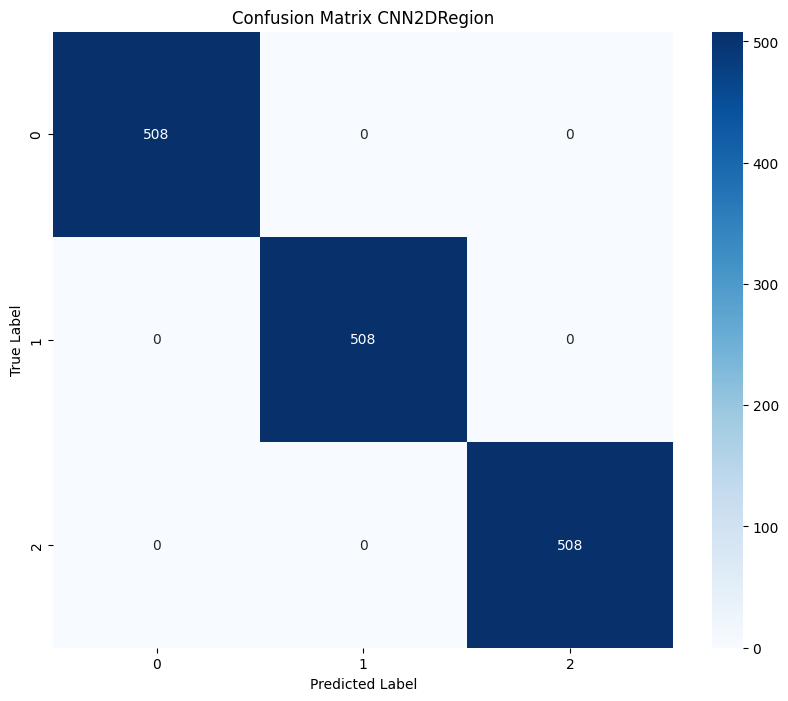


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       508
           2       1.00      1.00      1.00       508

    accuracy                           1.00      1524
   macro avg       1.00      1.00      1.00      1524
weighted avg       1.00      1.00      1.00      1524


Detailed Metrics by Class:

Class 0:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Class 1:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Overall Metrics:
Average Precision: 1.0000
Average Recall: 1.0000
Average F1-score: 1.0000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


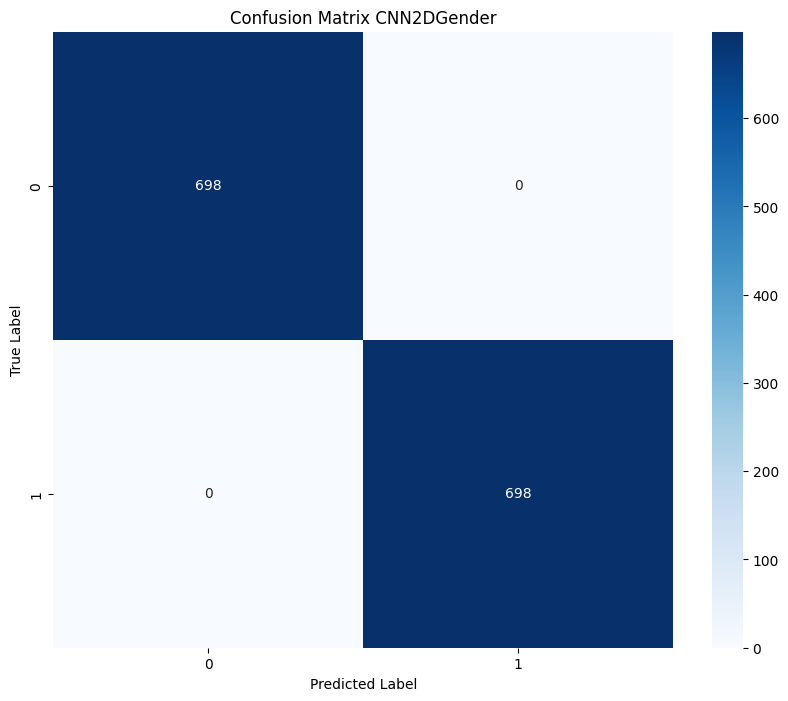


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       698
           1       1.00      1.00      1.00       698

    accuracy                           1.00      1396
   macro avg       1.00      1.00      1.00      1396
weighted avg       1.00      1.00      1.00      1396


Detailed Metrics by Class:

Class 0:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Class 1:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Overall Metrics:
Average Precision: 1.0000
Average Recall: 1.0000
Average F1-score: 1.0000


In [59]:
compute_confusion_matrix(CNN2DRegion, Xr_test_2D, yr_test_cat, 'CNN2DRegion')
compute_confusion_matrix(CNN2DGender, Xg_test_2D, yg_test_cat, 'CNN2DGender')

# Keras Tuner

In [60]:
# Hàm xây dựng mô hình với Keras Tuner
def build_region(hp):
    model = Sequential()

    # First Conv2D layer
    filters_0 = hp.Int('filters_0', min_value=16, max_value=96, step=16)
    kernel_size_0 = hp.Choice('kernel_size_0', values=[3, 5])
    l2_conv_0 = hp.Float('l2_conv_0', min_value=1e-4, max_value=1e-2, sampling='log')
    
    model.add(Conv2D(
        filters=filters_0,
        kernel_size=kernel_size_0,
        strides=1,
        padding='same',
        activation='relu',
        input_shape=(7, 10, 1),
        kernel_regularizer=l2(l2_conv_0)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(
        pool_size=hp.Choice('pool_size_0', values=[2, 3]),
        strides=1,
        padding='same'
    ))

    # Second Conv2D layer (tùy chọn)
    include_conv1 = hp.Boolean('include_conv1')
    if include_conv1:
        filters_1 = hp.Int('filters_1', min_value=16, max_value=64, step=16)
        kernel_size_1 = hp.Choice('kernel_size_1', values=[3, 5])
        l2_conv_1 = hp.Float('l2_conv_1', min_value=1e-4, max_value=1e-2, sampling='log')
        
        model.add(Conv2D(
            filters=filters_1,
            kernel_size=kernel_size_1,
            strides=1,
            padding='same',
            activation='relu',
            kernel_regularizer=l2(l2_conv_1)
        ))
        model.add(BatchNormalization())

    # Dropout sau Conv layers
    dropout_conv = hp.Float('dropout_conv', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(rate=dropout_conv))

    # Flatten
    model.add(Flatten())

    # First Dense layer (tùy chọn)
    include_dense0 = hp.Boolean('include_dense0')
    if include_dense0:
        units_0 = hp.Int('units_0', min_value=16, max_value=96, step=16)
        l2_dense_0 = hp.Float('l2_dense_0', min_value=1e-4, max_value=1e-2, sampling='log')
        dropout_dense_0 = hp.Float('dropout_dense_0', min_value=0.0, max_value=0.5, step=0.1)
        
        model.add(Dense(
            units=units_0,
            activation='relu',
            kernel_regularizer=l2(l2_dense_0)
        ))
        model.add(BatchNormalization())
        model.add(Dropout(rate=dropout_dense_0))

    # Second Dense layer
    units_1 = hp.Int('units_1', min_value=8, max_value=32, step=8)
    l2_dense_1 = hp.Float('l2_dense_1', min_value=1e-4, max_value=1e-2, sampling='log')
    dropout_dense_1 = hp.Float('dropout_dense_1', min_value=0.0, max_value=0.5, step=0.1)
    
    model.add(Dense(
        units=units_1,
        activation='relu',
        kernel_regularizer=l2(l2_dense_1)
    ))
    model.add(BatchNormalization())
    model.add(Dropout(rate=dropout_dense_1))

    # Output layer (3 lớp cho region)
    model.add(Dense(3, activation='softmax'))

    # Compile model
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model
    
# EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

tuner_region = kt.Hyperband(
    build_region,
    objective=kt.Objective("val_accuracy", direction="max"),
    max_epochs=10,
    factor=3,
    hyperband_iterations=2,
    directory='tuner_dir',
    project_name='cnn2d_region_hyperband'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Hàm xây dựng mô hình với Keras Tuner
def build_gender(hp):
    model = Sequential()

    # First Conv2D layer
    filters_0 = hp.Int('filters_0', min_value=16, max_value=96, step=16)
    kernel_size_0 = hp.Choice('kernel_size_0', values=[3, 5])
    l2_conv_0 = hp.Float('l2_conv_0', min_value=1e-4, max_value=1e-2, sampling='log')
    
    model.add(Conv2D(
        filters=filters_0,
        kernel_size=kernel_size_0,
        strides=1,
        padding='same',
        activation='relu',
        input_shape=(7, 10, 1),
        kernel_regularizer=l2(l2_conv_0)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(
        pool_size=hp.Choice('pool_size_0', values=[2, 3]),
        strides=1,
        padding='same'
    ))

    # Second Conv2D layer (tùy chọn)
    include_conv1 = hp.Boolean('include_conv1')
    if include_conv1:
        filters_1 = hp.Int('filters_1', min_value=16, max_value=64, step=16)
        kernel_size_1 = hp.Choice('kernel_size_1', values=[3, 5])
        l2_conv_1 = hp.Float('l2_conv_1', min_value=1e-4, max_value=1e-2, sampling='log')
        
        model.add(Conv2D(
            filters=filters_1,
            kernel_size=kernel_size_1,
            strides=1,
            padding='same',
            activation='relu',
            kernel_regularizer=l2(l2_conv_1)
        ))
        model.add(BatchNormalization())

    # Dropout sau Conv layers
    dropout_conv = hp.Float('dropout_conv', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(rate=dropout_conv))

    # Flatten
    model.add(Flatten())

    # First Dense layer (tùy chọn)
    include_dense0 = hp.Boolean('include_dense0')
    if include_dense0:
        units_0 = hp.Int('units_0', min_value=16, max_value=96, step=16)
        l2_dense_0 = hp.Float('l2_dense_0', min_value=1e-4, max_value=1e-2, sampling='log')
        dropout_dense_0 = hp.Float('dropout_dense_0', min_value=0.0, max_value=0.5, step=0.1)
        
        model.add(Dense(
            units=units_0,
            activation='relu',
            kernel_regularizer=l2(l2_dense_0)
        ))
        model.add(BatchNormalization())
        model.add(Dropout(rate=dropout_dense_0))

    # Second Dense layer
    units_1 = hp.Int('units_1', min_value=8, max_value=32, step=8)
    l2_dense_1 = hp.Float('l2_dense_1', min_value=1e-4, max_value=1e-2, sampling='log')
    dropout_dense_1 = hp.Float('dropout_dense_1', min_value=0.0, max_value=0.5, step=0.1)
    
    model.add(Dense(
        units=units_1,
        activation='relu',
        kernel_regularizer=l2(l2_dense_1)
    ))
    model.add(BatchNormalization())
    model.add(Dropout(rate=dropout_dense_1))

    # Output layer (3 lớp cho region)
    model.add(Dense(2, activation='softmax'))

    # Compile model
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


# EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

tuner_gender = kt.Hyperband(
    build_gender,
    objective=kt.Objective("val_accuracy", direction="max"),
    max_epochs=10,
    factor=3,
    hyperband_iterations=2,
    directory='tuner_dir',
    project_name='cnn2d_gender_hyperband'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Tìm kiếm mô hình
tuner_region.search(
    Xr_train_2D, yr_train_cat, 
    epochs=50, batch_size=64,
    validation_data=(Xr_dev_2D, yr_dev_cat), 
    callbacks=[early_stopping], verbose=2 
)

Trial 60 Complete [00h 00m 15s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 11m 00s


TypeError: BaseTuner.get_best_hyperparameters() got an unexpected keyword argument 'num_models'

Trial 60 Complete [00h 00m 15s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 11m 00s

In [64]:
# Lấy mô hình tốt nhất
best_model = tuner_region.get_best_models(num_models=1)[0]
best_hyperparameters = tuner_region.get_best_hyperparameters(num_trials=1)[0]

# In thông tin mô hình tốt nhất
print("Best hyperparameters:")
for param, value in best_hyperparameters.values.items():
    print(f"{param}: {value}")
best_model.summary()

# Đánh giá trên tập test
test_loss, test_accuracy = best_model.evaluate(Xr_test_2D, yr_test_cat)
print("Test accuracy:", test_accuracy)

# Lưu mô hình nhẹ nhất
best_model.save("cnn2d_region_light_hyperband.keras")

Best hyperparameters:
filters_0: 32
kernel_size_0: 3
l2_conv_0: 0.0007961392541986054
pool_size_0: 2
include_conv1: False
dropout_conv: 0.2
include_dense0: False
units_1: 8
l2_dense_1: 0.002178803054091246
dropout_dense_1: 0.2
learning_rate: 0.0007338716918437444
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 7, 10, 32)           │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 10, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 7, 10, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 10, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2240)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │          17,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,435 (72.01 KB)

 Trainable params: 18,355 (71.70 KB)

 Non-trainable params: 80 (320.00 B)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.1029
Test accuracy: 1.0


Best hyperparameters:
filters_0: 32
kernel_size_0: 3
l2_conv_0: 0.0007961392541986054
pool_size_0: 2
include_conv1: False
dropout_conv: 0.2
include_dense0: False
units_1: 8
l2_dense_1: 0.002178803054091246
dropout_dense_1: 0.2
learning_rate: 0.0007338716918437444
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0

In [12]:
# Tìm kiếm mô hình
tuner_gender.search(
    Xg_train_2D, yg_train_cat, 
    epochs=50, batch_size=64,
    validation_data=(Xg_dev_2D, yg_dev_cat), 
    callbacks=[early_stopping], verbose=2 
)

Trial 60 Complete [00h 00m 13s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 11m 40s


Trial 60 Complete [00h 00m 13s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 11m 40s

In [14]:
# Lấy mô hình tốt nhất
best_model = tuner_gender.get_best_models(num_models=1)[0]
best_hyperparameters = tuner_gender.get_best_hyperparameters(num_trials=1)[0]

# In thông tin mô hình tốt nhất
print("Best hyperparameters:")
for param, value in best_hyperparameters.values.items():
    print(f"{param}: {value}")
best_model.summary()

# Đánh giá trên tập test
test_loss, test_accuracy = best_model.evaluate(Xg_test_2D, yg_test_cat)
print("Test accuracy:", test_accuracy)

# Lưu mô hình nhẹ nhất
best_model.save("cnn2d_gender_light_hyperband.keras")

Best hyperparameters:
filters_0: 32
kernel_size_0: 5
l2_conv_0: 0.0012634328852360272
pool_size_0: 2
include_conv1: True
dropout_conv: 0.2
include_dense0: False
units_1: 8
l2_dense_1: 0.007214357610994804
dropout_dense_1: 0.4
learning_rate: 0.0025811754115584026
filters_1: 16
kernel_size_1: 3
l2_conv_1: 0.00037679198507080863
units_0: 16
l2_dense_0: 0.00021477648367203856
dropout_dense_0: 0.0
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 7, 10, 32)           │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 10, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 7, 10, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 10, 16)           │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 10, 16)           │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 10, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1120)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │           8,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,666 (57.29 KB)

 Trainable params: 14,554 (56.85 KB)

 Non-trainable params: 112 (448.00 B)

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 1.0000 - loss: 0.2350
Test accuracy: 1.0


Best hyperparameters:
filters_0: 32
kernel_size_0: 5
l2_conv_0: 0.0012634328852360272
pool_size_0: 2
include_conv1: True
dropout_conv: 0.2
include_dense0: False
units_1: 8
l2_dense_1: 0.007214357610994804
dropout_dense_1: 0.4
learning_rate: 0.0025811754115584026
filters_1: 16
kernel_size_1: 3
l2_conv_1: 0.00037679198507080863
units_0: 16
l2_dense_0: 0.00021477648367203856
dropout_dense_0: 0.0
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0

# Total Test

In [28]:
Total_test_SRR = np.concatenate([Xr_train_2D, Xr_dev_2D, Xr_test_2D], axis=0)
Total_test_SGR = np.concatenate([Xg_train_2D, Xg_dev_2D, Xg_test_2D], axis=0)
yr_final_cat = np.concatenate([yr_train_cat, yr_dev_cat, yr_test_cat], axis=0)
yg_final_cat = np.concatenate([yg_train_cat, yg_dev_cat, yg_test_cat], axis=0)

In [29]:
Region_best = tf.keras.models.load_model('/kaggle/input/model-trained/cnn2d_region_light_hyperband.keras')
Gender_best = tf.keras.models.load_model('/kaggle/input/model-trained/cnn2d_gender_light_hyperband.keras')

In [30]:
test_loss, test_accuracy = Region_best.evaluate(Total_test_SRR, yr_final_cat)
test_loss2, test_accuracy2 = Gender_best.evaluate(Total_test_SGR, yg_final_cat)

477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.1026
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.2330


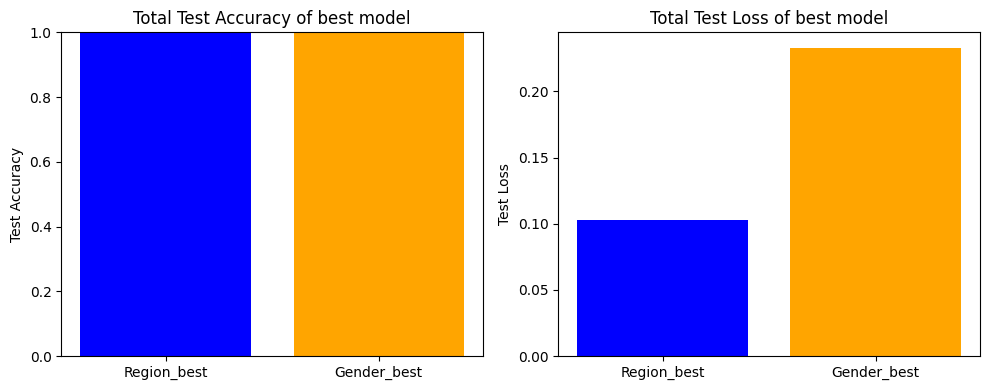

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu đánh giá
models = ['Region_best', 'Gender_best']
test_accuracies = [test_accuracy, test_accuracy2]
test_losses = [test_loss, test_loss2]

# Vẽ biểu đồ độ chính xác
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(models, test_accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Giới hạn trục y từ 0 đến 1
plt.ylabel('Test Accuracy')
plt.title('Total Test Accuracy of best model')

# Vẽ biểu đồ loss
plt.subplot(1, 2, 2)
plt.bar(models, test_losses, color=['blue', 'orange'])
plt.ylabel('Test Loss')
plt.title('Total Test Loss of best model')

plt.tight_layout()
plt.show()
